#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 3

### <span style="color:royalblue">Esercizio 03.1
La teoria di Black-Scholes prevede che l'evoluzione temporale del prezzo di asset sia stocastica e segua un moto Browniano geometrico (GMB) che ha per costanti il tasso di interesse privo di rischio $r$ e la volatilità $\sigma$. Quindi $S(t)$ ha un andamento del tipo:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
dove:
- Tasso di interesse privo di rischio: $r=0.1$
- Volatilità: $\sigma=0.25$
- $W(t)$ è un processo di Wiener

Mediante metodo Monte Carlo ($10^5$ processi stocastici suddivisi in $100$ blocchi) si sono calcolati i prezzi delle "European call-option" $C[S(t),t]$ e "European put-option" $P[S(t),t]$mediante:
1. Campionamento diretto del prezzo finale di asset: si genera direttamente il prezzo di $S(T)$ mediante la formula:
$$S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma z  \sqrt{T} \right]$$
con $z \sim N(0,1)$
3. Dividendo il percorso del prezzo di asset (e quindi l'intervallo [0,T)) in 100 parti
$$S(T_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma z_{i+1}  \sqrt{t_{i+1}-t_i} \right] $$
sempre con $z_{i+1} = \sim N(0,1)$

Le opzioni europee sono strumenti finanziari che danno al possessore il diritto, ma non l'obbligo, di comprare (call) o vendere (put) un'attività sottostante a un prezzo prestabilito (strike price $K$) entro una scadenza temporale $T$.

Sapendo che $S(T)$ indica il prezzo di asset al tempo $T$, per portare il profitto indietro al tempo genrico $t$ va diviso per un fattore $e^{rT}$. Quindi, il profilo di rendimento (Payoff) per le opzioni di call al tempo $t$ sarà $e^{-rT}max(S(T)-K,0)$ e sarà, invece, $e^{-rT}max(K-S(T),0)$ per le opzioni di put.

I grafici rappresentano le stime dirette e discrete delle opzioni di call e di put con le loro incertezze, è stato riportato anche il valore di tali opzioni calcolate analiticamente con la teoria di Black-Scholes come confronto. 

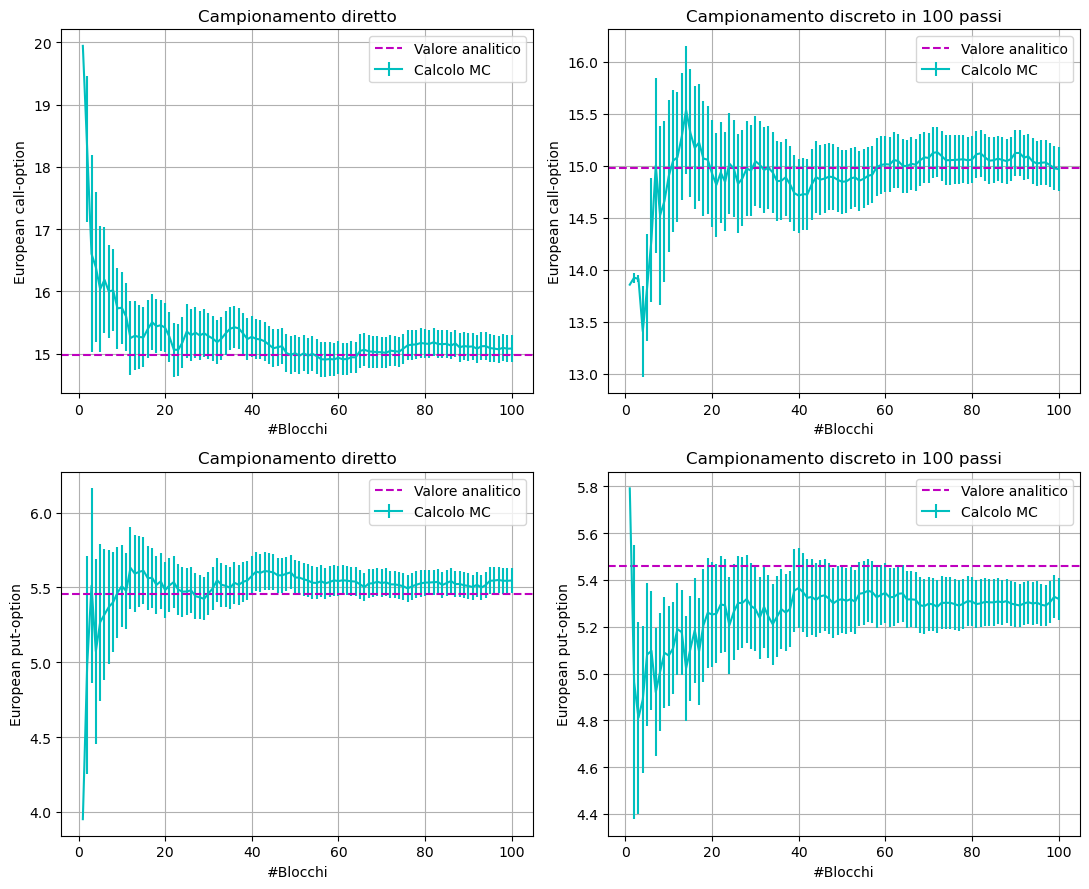

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import math
import os,sys
import math
from scipy.optimize import curve_fit

dinp = "03.1/"
finp1 = dinp + "ese_03_1_pt1_C.out"
finp2 = dinp + "ese_03_1_pt2_C.out"
finp3 = dinp + "ese_03_1_pt1_P.out"
finp4 = dinp + "ese_03_1_pt2_P.out"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )
if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )
if not os.path.isfile(finp3):
    sys.exit( "file does not exist: " + finp3 )
if not os.path.isfile(finp4):
    sys.exit( "file does not exist: " + finp4 )

fig, axes = plt.subplots(2, 2, figsize=(11, 9))

# Call diretto
x, y_call_dir, error_call_dir = np.loadtxt(finp1, usecols=(0,2,3), delimiter=' ', unpack='true')
axes[0,0].errorbar(x, y_call_dir, yerr=error_call_dir, label='Calcolo MC', color='c')
axes[0,0].set_xlabel('#Blocchi')
axes[0,0].set_ylabel('European call-option')
axes[0,0].set_title("Campionamento diretto")
axes[0,0].axhline(y=14.975790778311286, color='m', linestyle="--", label='Valore analitico') #Confornto con il valore analitico
axes[0,0].legend()
axes[0,0].grid(True)

# Call discretizzato
x, y_call_disc, error_call_disc = np.loadtxt(finp2, usecols=(0,2,3), delimiter=' ', unpack='true')
axes[0,1].errorbar(x, y_call_disc, yerr=error_call_disc, label='Calcolo MC', color='c')
axes[0,1].set_xlabel('#Blocchi')
axes[0,1].set_ylabel('European call-option')
axes[0,1].set_title('Campionamento discreto in 100 passi')
axes[0,1].axhline(y=14.975790778311286, color='m', linestyle="--", label='Valore analitico') #Confornto con il valore analitico
axes[0,1].legend()
axes[0,1].grid(True)

#Put diretto 
x, y_put_dir, error_put_dir = np.loadtxt(finp3, usecols=(0,2,3), delimiter=' ', unpack='true')
axes[1,0].errorbar(x, y_put_dir, yerr=error_put_dir, label='Calcolo MC', color='c')
axes[1,0].set_xlabel('#Blocchi')
axes[1,0].set_ylabel('European put-option')
axes[1,0].set_title("Campionamento diretto")
axes[1,0].axhline(y=5.4595325819072364, color='m', linestyle="--", label='Valore analitico') #Confornto con il valore analitico
axes[1,0].legend()
axes[1,0].grid(True)

#Put discretizzato
x, y_put_disc, error_put_disc = np.loadtxt(finp4, usecols=(0,2,3), delimiter=' ', unpack='true')
axes[1,1].errorbar(x, y_put_disc, yerr=error_put_disc, label='Calcolo MC', color='c')
axes[1,1].set_xlabel('#Blocchi')
axes[1,1].set_ylabel('European put-option')
axes[1,1].set_title('Campionamento discreto in 100 passi')
axes[1,1].axhline(y=5.4595325819072364, color='m', linestyle="--", label='Valore analitico') #Confornto con il valore analitico
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()#evito sovrapposizioni
plt.show()
